In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib   
from sympy import diff
from sympy import symbols
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

# Logistic 回归

In [2]:
filename = 'LogisticReg_LinearDB.txt'
data = pd.read_csv(filename, sep=',', header=None, names=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


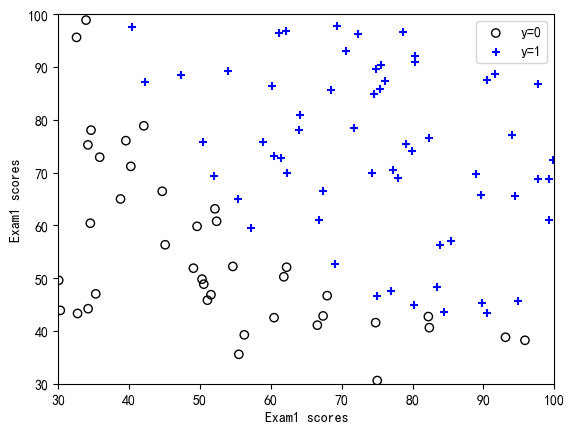

In [3]:
# 散点图

# 数据
XY = data.values
n = len(XY)
X1 = [XY[i, 0] for i in range(n) if XY[i, -1]==0]
Y1 = [XY[i, 1] for i in range(n) if XY[i, -1]==0]
X2 = [XY[i, 0] for i in range(n) if XY[i, -1]==1]
Y2 = [XY[i, 1] for i in range(n) if XY[i, -1]==1]

# 画图
plt.scatter(X1, Y1, c='none' ,marker='o', edgecolor='black')
plt.scatter(X2, Y2, marker='+', color='blue')
plt.xlabel('Exam1 scores')
plt.ylabel('Exam1 scores')
plt.xlim([30, 100])
plt.ylim([30, 100])
plt.legend(['y=0', 'y=1'])

### hypothesis如下

> - $h_\theta(x)=g(\theta^Tx)$
> 
> - $g(z) = \frac{1}{1-e^{-z}}$
> - 且有$g'(z) = g(z)·(1-g(z))$
> > 当$z\geq0$时，有$g(z)\geq0.5$;  
> > 当$z<0$时，有$g(z)<0.5$  
> > - $\theta^Tx\geq0$ $\rightarrow$ $h_\theta(x)\geq0$ $\rightarrow$ $y=1$
> > - $\theta^Tx<0$ $\rightarrow$ $h_\theta(x)<0$ $\rightarrow$ $y=0$

### cost function如下
> - $$J(\theta) = \frac{1}{m} \sum_{i=1}^m{Cost(h_{\theta}(x^{(i)}), y^{(i)})} $$
>
> - $$
\text{Cost}(h_{\theta}(x^{(i)}), y^{(i)}) = 
\begin{cases} 
-\log(h_{\theta}(x^{(i)})) & \text{if } y^{(i)} = 1 \\ 
-\log(1 - h_{\theta}(x^{(i)})) & \text{if } y^{(i)} = 0 
\end{cases}
$$
> - 即可得到  
> $$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right]$$

### gradient如下
> 梯度为：$$ \frac{\partial J(\theta)}{\partial \theta}$$  
> 对其中某一对变量而言：
> $$J(\theta; x_i, y_i)=y^{(i)}\log(h_{\theta}(x^{(i)})) + (1-y^{(i)})\log(1-h_{\theta}(x^{(i)})) $$  
> $$\Downarrow$$  
> $$ \frac{\partial J(\theta; x_i, y_i)}{\partial \theta_j}= (\frac{y^{(i)}}{h_{\theta}(x^{(i)})} - \frac{1-y^{(i)}}{1-h_{\theta}(x^{(i)})} )·\frac{\partial h_{\theta}(x^{(i)})}{\partial \theta_j}$$
> $$\Downarrow$$  
> $$ \frac{\partial J(\theta; x_i, y_i)}{\partial \theta_j}= (\frac{y^{(i)}}{h_{\theta}(x^{(i)})} - \frac{1-y^{(i)}}{1-h_{\theta}(x^{(i)})} )·h_{\theta}(x^{(i)})·(1-h_{\theta}(x^{(i)}))·x_{ij}$$  
> $$\Downarrow$$
> $$ \frac{\partial J(\theta; x_i, y_i)}{\partial \theta_j}= (y^{(i)}-h_\theta(x^{(i)}))·x_{ij}$$
> 则 $$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m{(h_{\theta}(x^{(i)})-y^{(i)})·x_{ij}}$$
> 

In [4]:
def h_theta(theta, x):
    z = theta.T @ x
    h = 1/(1+np.e**(-z))
    return h

$$y = \theta_0+\theta_1x_1 + \theta_2x_2$$

In [5]:
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
# data X and Y 
X = data[['x1', 'x2']].values
X = sm.add_constant(X)

m, n= X.shape

Y = data['y'].values.reshape(m, 1)

In [7]:
#梯度下降法求解

tol = 1e-6; N = 5e6; error = 1

alpha = 0.001
k = 0; kk = 0
theta_old = np.zeros((n, ))
theta_new = np.zeros((n, ))
J = np.zeros((int(N), ))

while error>tol and k<N:
    summation = np.zeros((n, ))
    # 求梯度（偏导数）
    for i in range(m):
        summation = summation + (h_theta(theta_old, X[i, :]) - Y[i, 0])*X[i, :]
    theta_new = theta_old - alpha*(1.0/m)*summation

    # cost function
    if k%10000==0:
        for i in range(m):
            J[kk] = J[kk] + Y[i, 0]* np.log(h_theta(theta_old, X[i, :])) + (1-Y[i, :])*np.log(1-h_theta(theta_old, X[i, :]))
        J[kk] = -J[kk]/m
        kk = kk + 1

    k = k + 1
    error = np.max(np.abs(theta_new - theta_old))
    theta_old = theta_new

print('回归系数为', theta_new)
print(f'迭代次数为：{k}')

C:\Users\86158\AppData\Local\Temp\ipykernel_21628\2821751382.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[kk] = J[kk] + Y[i, 0]* np.log(h_theta(theta_old, X[i, :])) + (1-Y[i, :])*np.log(1-h_theta(theta_old, X[i, :]))


回归系数为 [-22.28350136   0.18322436   0.17817866]
迭代次数为：3981299


Text(0.5, 1.0, 'alpha = 0.001, tol = 1e-06, k = 3981299')

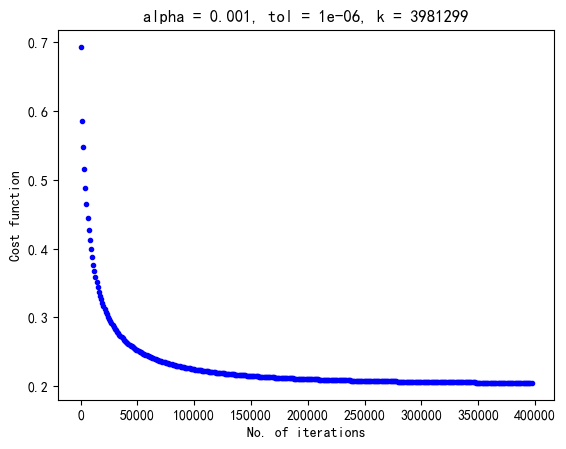

In [8]:
plt.plot(np.arange(kk-1)*1000, J[0:kk-1], 'b.')
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title('alpha = ' + str(alpha) + ', tol = ' + str(tol) + ', k = ' + str(k) )

Text(35, 35, '-22.2835+0.1832*x1+0.1782*x2=0')

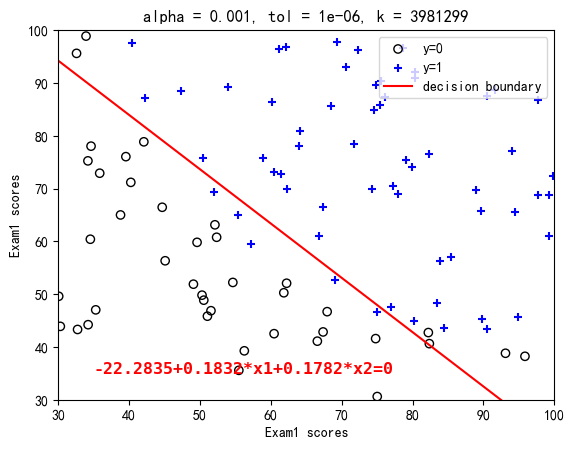

In [9]:
# 散点图

# 数据
XY = data.values
n = len(XY)
X1 = [XY[i, 0] for i in range(n) if XY[i, -1]==0]
Y1 = [XY[i, 1] for i in range(n) if XY[i, -1]==0]
X2 = [XY[i, 0] for i in range(n) if XY[i, -1]==1]
Y2 = [XY[i, 1] for i in range(n) if XY[i, -1]==1]

x1_min = np.min(X1)
x2_1 = (theta_new[0] + theta_new[1]*x1_min) / (-theta_new[2]) 

x1_max = np.max(X1)
x2_2 = (theta_new[0] + theta_new[1]*x1_max) / (-theta_new[2])

# 画图
plt.scatter(X1, Y1, c='none' ,marker='o', edgecolor='black')
plt.scatter(X2, Y2, marker='+', color='blue')

plt.plot([x1_min, x1_max], [x2_1, x2_2], 'red')

# 注释、标题、文本
plt.xlabel('Exam1 scores')
plt.ylabel('Exam1 scores')
plt.xlim([30, 100])
plt.ylim([30, 100])
plt.legend(['y=0', 'y=1', 'decision boundary'], loc="upper right")

plt.title('alpha = ' + str(alpha) + ', tol = ' + str(tol) + ', k = ' + str(k) )
plt.text(x=35, y=35, s=f'{theta_new[0]:.4f}+{theta_new[1]:.4f}*x1+{theta_new[2]:.4f}*x2=0', ha='left', va='baseline', 
         fontdict=dict(fontsize=12, color='r',family='monospace', weight='bold',))

$$J(\theta_0,\theta_1)=\frac{1}{m} \sum_{i=1}^m{(h_\theta(x^{(i)})-y^{(i)})^2}$$